In [ ]:
#Frequency Domain representation of Razavi CTLE Response
#https://www.halvorsen.blog/documents/programming/python/resources/powerpoints/Frequency%20Response%20with%20Python.pdf
#Utilized the above document as a reference for designing the CTLE response.

H(s) = TransferFunctionContinuous(
array([1., 1.]),
array([ 1. , -1.5]),
dt: None
)


<IPython.core.display.Javascript object>


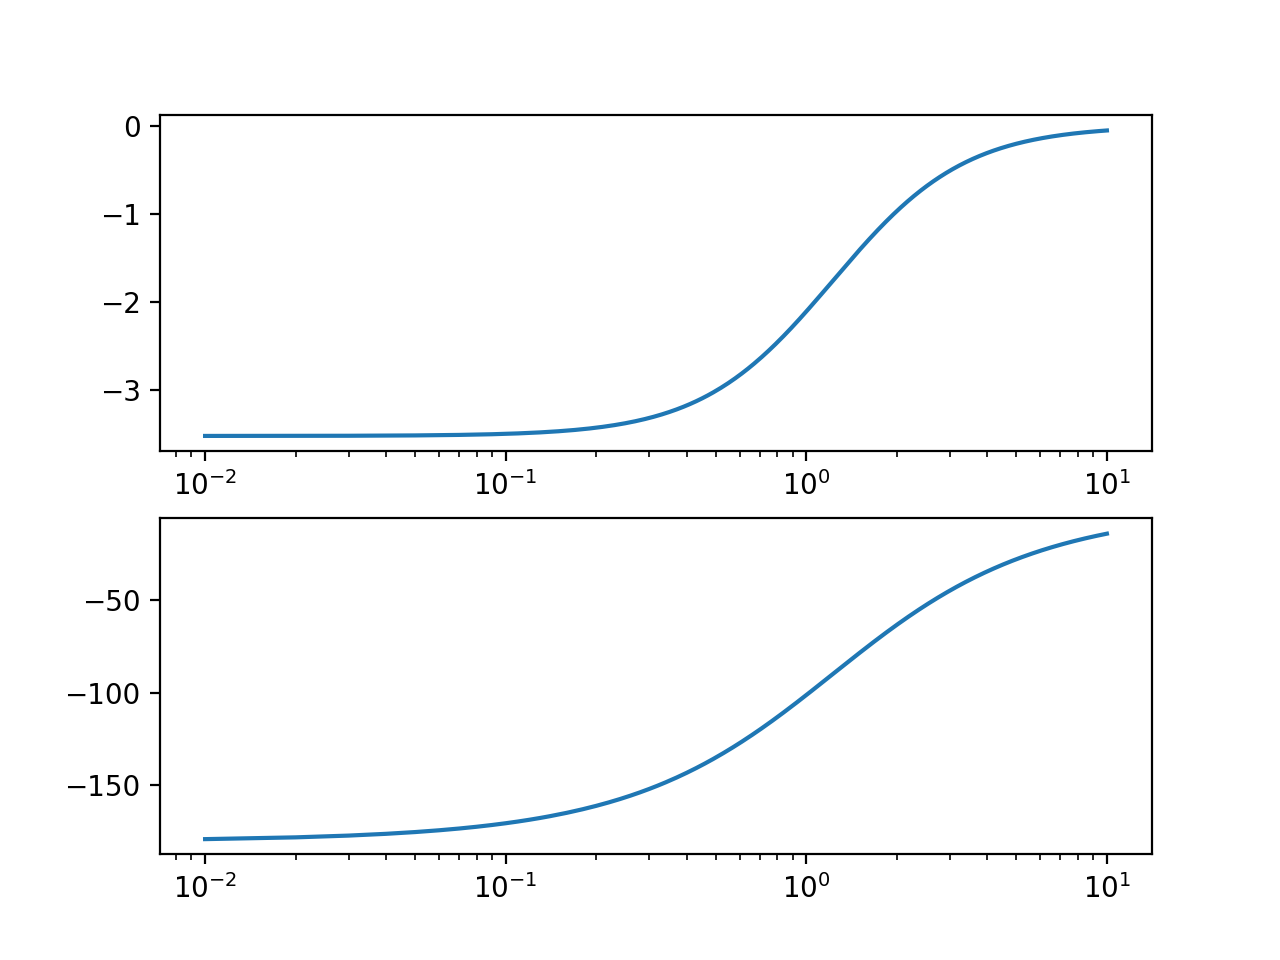

In [2]:


import numpy as np
import scipy.signal as signal
%matplotlib notebook
import matplotlib.pyplot as plt
import sympy
import math
sympy.init_printing()
t, s = sympy.symbols('t, s')
a = sympy.symbols('a', real=True, positive=True)

#num=np.array([3]) - Working Original
#den=np.array([4, 1]) - Working Oriignal
gm=1
rs=1
rd=1
cs=1
#t=30

#These definitions are for the Laplace transform! can be ignored in this!
def invL(F):
    return sympy.inverse_laplace_transform(F, s, t)
F = ((-gm*rd)*(rs*cs*s+1))/((rs*cs*s+1)+(gm*rs)/2)
def DiracDelta(t):
    return 1
def Heaviside(t):
    if(t<0):
        return 0
    else:
        return 1
T= invL(F.apart(s))

##below are the definitions for the frequency domain modeling of the CTLE response.
num1 = np.array([-gm*rd])
num2= np.array([(rs*cs), 1])
num = np.convolve(num1, num2)
den1=np.array([-rs*cs, 1+(gm*rs/2)])
H=signal.TransferFunction(num, den1)
print('H(s) =', H)
num3=np.array([-4])
num4=np.array([12, 7])
num5=np.convolve(num3, num4)
den4=np.array([8, 14])
P=signal.TransferFunction(num5, den4)


w_start=0.01
w_stop=10
step=0.01
N=int((w_stop-w_start)/step)+1
w=np.linspace(w_start, w_stop, N)
w, mag, phase = signal.bode(H, w)

plt.figure()
plt.subplot(2, 1, 1)
plt.semilogx(w, mag)

plt.subplot(2, 1, 2)
plt.semilogx(w, phase)

#S=-1.0*DiracDelta(t) + 0.5*exp(-1.5*t)*Heaviside(t)
#Below are two plots of the dB and phase response with respect to frequency increases .







